In [2]:
import os
import numpy as np
import shutil
import pandas as pd

**TRAINING/TESTING MODEL**

In [3]:
# libraries required to train the model
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
#path to get images
train_path='C:/Users/Uday/Desktop/python/Major/New-Data/train'
val_path='C:/Users/Uday/Desktop/python/Major/New-Data/valid'
test_path='C:/Users/Uday/Desktop/python/Major/New-Data/test'

In [5]:
#re-size all the images to a size VGG-16 expects.
img_size=[224, 224]

#set the batch size
batch_size=32  #try reducing batch size or freeze more layers if your GPU runs out of memory
no_epochs=5
lr=0.0001
no_classes=3

In [6]:
import os

classes=os.listdir(train_path)
no_classes=len(classes)

In [7]:
print("Class --> {} \n and the length is : {}".format(classes, no_classes))

Class --> ['COVID19', 'LUNG CANCER', 'NORMAL', 'PNEUMONIA', 'TUBERCULOSIS'] 
 and the length is : 5


In [8]:
#image data augmentation
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [9]:
#import the images from the train dataset
#make sure to provide the same target size as initialied for the image size
training_set=train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 10845 images belonging to 5 classes.


In [13]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [14]:
#import the images from the test dataset.

test_set=test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1421 images belonging to 5 classes.


In [11]:
#import the VGG 16 library as shown below and add preprocessing layer to the front of VGG
#here we will be using imagenet weights

vgg = VGG16(input_shape=img_size+[3], weights='imagenet', include_top=False)

In [12]:
#don't train existing weights
for layer in vgg.layers:
    layer.trainable=False

In [14]:
#our layers - you can add more if you want
x=Flatten()(vgg.output)

prediction=Dense(no_classes, activation='softmax')(x)

In [15]:
#create a model object
model=Model(inputs=vgg.input, outputs=prediction)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
#tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:
#fit the model
history=model.fit(
    training_set, 
    validation_data=test_set, 
    epochs=5, 
    steps_per_epoch=len(training_set), 
    validation_steps=len(test_set)
    )

Epoch 1/5
339/339 [==============================] - 2811s 8s/step - loss: 0.1836 - accuracy: 0.9384 - val_loss: 0.6123 - val_accuracy: 0.8937
Epoch 2/5
339/339 [==============================] - 2719s 8s/step - loss: 0.1577 - accuracy: 0.9473 - val_loss: 0.4499 - val_accuracy: 0.9099
Epoch 3/5
339/339 [==============================] - 2584s 8s/step - loss: 0.1465 - accuracy: 0.9527 - val_loss: 0.3961 - val_accuracy: 0.9317
Epoch 4/5
339/339 [==============================] - 2726s 8s/step - loss: 0.1303 - accuracy: 0.9591 - val_loss: 0.7041 - val_accuracy: 0.9233
Epoch 5/5
339/339 [==============================] - 2544s 8s/step - loss: 0.1256 - accuracy: 0.9593 - val_loss: 0.3500 - val_accuracy: 0.9444


In [23]:
#generate Validation set
validation_datagen=ImageDataGenerator(rescale=1./255)


validation_set=validation_datagen.flow_from_directory(
    directory=val_path, 
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1326 images belonging to 5 classes.


In [24]:
#just capture the loss and accuray into val variable
validation_steps=4

loss,accuracy=model.evaluate(validation_set, steps=validation_steps)

print("loss: {:.2f}".format(loss))
print("accuracy: {:.2f}".format(accuracy))

4/4 [==============================] - 18s 5s/step - loss: 0.0900 - accuracy: 0.9609
loss: 0.09
accuracy: 0.96


In [25]:
model.save('C:/Users/Uday/Desktop/python/Major/Vgg_Model.h5')

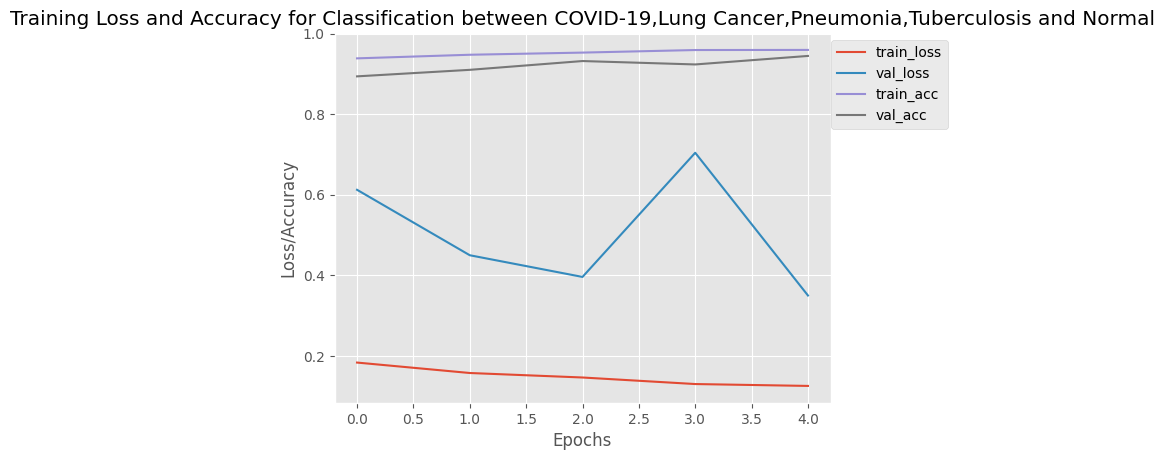

In [26]:
#loss/accuracy graph
n=no_epochs
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, n), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, n), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy for Classification between COVID-19,Lung Cancer,Pneumonia,Tuberculosis and Normal")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
plt.savefig("plot1.png")

In [27]:
#to check test accuacy
modelLoss, modelAccuracy=model.evaluate(test_set, verbose=0)

print('Test Loss is: {}'.format(modelLoss))
print('Test Accuracy is: {}'.format(modelAccuracy ))

Test Loss is: 0.35000544786453247
Test Accuracy is: 0.9444053769111633


**PREDICTING THE OUTPUT**

In [34]:
#loading the model
from tensorflow import keras
model=keras.models.load_model('C:/Users/Uday/Desktop/python/Major/Vgg_Model.h5')

In [35]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [36]:
#get sample image to test
img_lungcancer = load_img('C:/Users/Uday/Desktop/python/Major/New-Data/valid/LUNG CANCER/000111.jpg', target_size=(224, 224))
img_normal=load_img('C:/Users/Uday/Desktop/python/Major/New-Data/valid/NORMAL/NORMAL(11).jpg', target_size=(224, 224))
img_covid=load_img('C:/Users/Uday/Desktop/python/Major/New-Data/valid/COVID19/COVID19(227).jpg', target_size=(224, 224))
img_tuberculosis=load_img('C:/Users/Uday/Desktop/python/Major/New-Data/valid/TUBERCULOSIS/TUBERCULOSIS-32.jpg', target_size=(224, 224))
img_pneumonia=load_img('C:/Users/Uday/Desktop/python/Major/New-Data/valid/PNEUMONIA/PNEUMONIA(2).jpg', target_size=(224, 224))

In [37]:
def model_predict(img, actual):
    x=img_to_array(img)
    x=np.expand_dims(x, axis=0)
    x_processed=preprocess_input(x)
    result=model.predict(x_processed)
    index = np.argmax(result,axis=1)
    if index==0:
       result="COVID-19"
    elif index==1:
       result="LUNG CANCER"
    elif index == 2:
       result="NORMAL"
    elif index == 3:
        result="PNEUMONIA"
    else:
        result = "TUBERCULOSIS"
    plt.figure()
    plt.imshow(img)
    plt.title('Actual : {} --> Predicted  : {}'.format(actual, result))

1/1 [==============================] - 0s 316ms/step


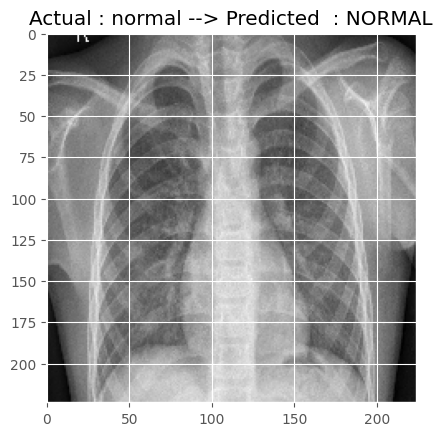

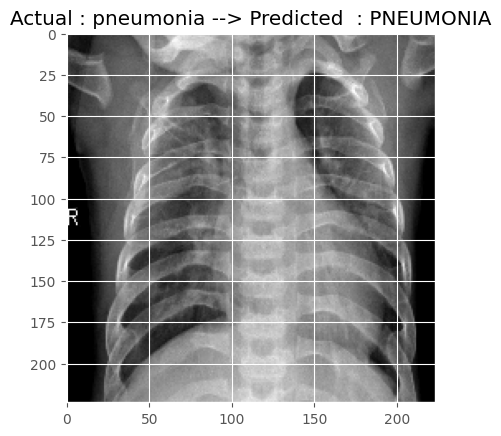

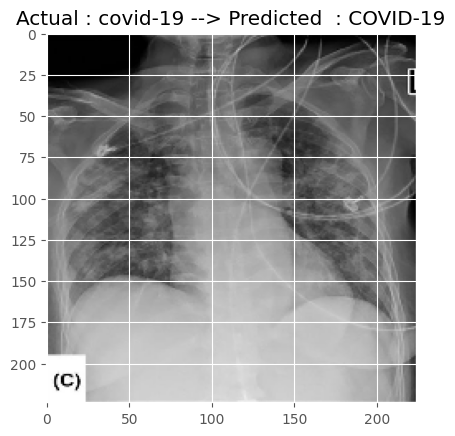

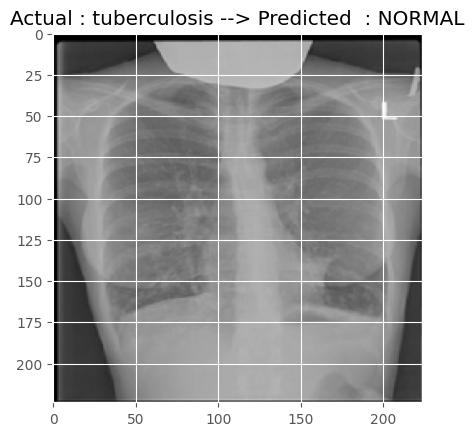

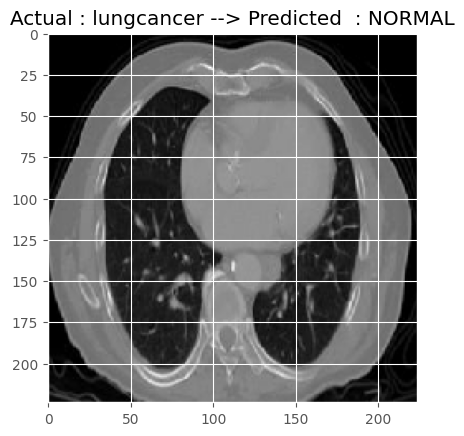

In [38]:
pred_normal=model_predict(img_normal, "normal")
pred_pneumonia=model_predict(img_pneumonia, "pneumonia")
pred_covid=model_predict(img_covid, "covid-19")
pred_tuberculosis=model_predict(img_tuberculosis, "tuberculosis")
pred_lungcancer=model_predict(img_lungcancer,"lungcancer")

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import load_model
batch_size = 9
test_set=test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle = False
)
Vgg_model = load_model("C:/Users/Uday/Desktop/python/Major/Vgg_Model.h5")
Y_pred = Vgg_model.predict(test_set, test_set.samples // test_set.batch_size)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
confusionmatrix = confusion_matrix(test_set.classes, y_pred)
print(confusionmatrix)
print('Classification Report')
target_names = ['COVID19', 'LUNG CANCER', 'NORMAL','PNEUMONIA','TUBERCULOSIS']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

Found 1421 images belonging to 5 classes.
158/158 [==============================] - 280s 2s/step
Confusion Matrix
[[119   0   0   1   1]
 [  0 224   0   0   0]
 [  0   2 309   9   0]
 [  1   0  14 689   0]
 [ 33   0  12   6   1]]
Classification Report
              precision    recall  f1-score   support

     COVID19       0.78      0.98      0.87       121
 LUNG CANCER       0.99      1.00      1.00       224
      NORMAL       0.92      0.97      0.94       320
   PNEUMONIA       0.98      0.98      0.98       704
TUBERCULOSIS       0.50      0.02      0.04        52

    accuracy                           0.94      1421
   macro avg       0.83      0.79      0.76      1421
weighted avg       0.93      0.94      0.93      1421



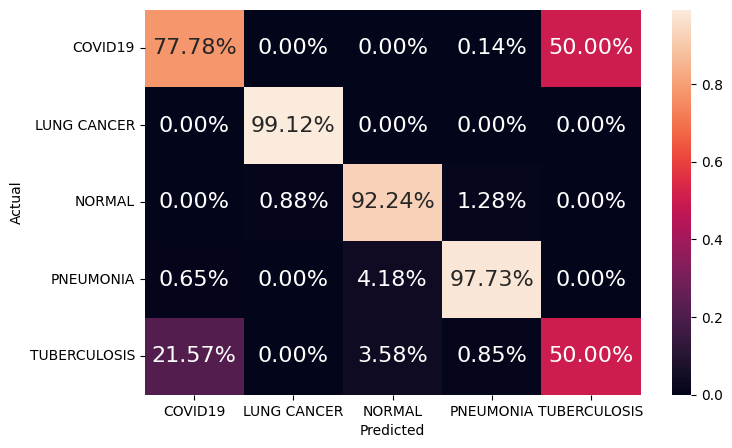

In [16]:
import seaborn as sns
df_cm=pd.DataFrame(confusionmatrix, columns=classes, index=classes)
df_cm.index.name='Actual'
df_cm.columns.name='Predicted'
plt.figure(figsize=(8,5))
sns.heatmap(df_cm/np.sum(df_cm), fmt='.2%', annot=True, annot_kws={'size':16})
plt.show()

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import load_model
batch_size = 32
training_set=train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle = False
)
Vgg_model = load_model("C:/Users/Uday/Desktop/python/Major/Vgg_Model.h5")
Y1_pred = Vgg_model.predict(training_set, training_set.samples //training_set.batch_size)
y1_pred = np.argmax(Y1_pred, axis=1)
print('Confusion Matrix')
confusionmatrix = confusion_matrix(training_set.classes, y1_pred)
print(confusionmatrix)
print('Classification Report (train)')
target_names = ['COVID19', 'LUNG CANCER', 'NORMAL','PNEUMONIA','TUBERCULOSIS']
print(classification_report(training_set.classes, y1_pred, target_names=target_names))

Found 10845 images belonging to 5 classes.
339/339 [==============================] - 2170s 6s/step
Confusion Matrix
[[2488    0    1   23   10]
 [   0  418    0    0    0]
 [  15    4 3067  293    1]
 [   8    0   39 3943    0]
 [   6    0    0    0  529]]
Classification Report (train)
              precision    recall  f1-score   support

     COVID19       0.99      0.99      0.99      2522
 LUNG CANCER       0.99      1.00      1.00       418
      NORMAL       0.99      0.91      0.95      3380
   PNEUMONIA       0.93      0.99      0.96      3990
TUBERCULOSIS       0.98      0.99      0.98       535

    accuracy                           0.96     10845
   macro avg       0.97      0.97      0.97     10845
weighted avg       0.96      0.96      0.96     10845



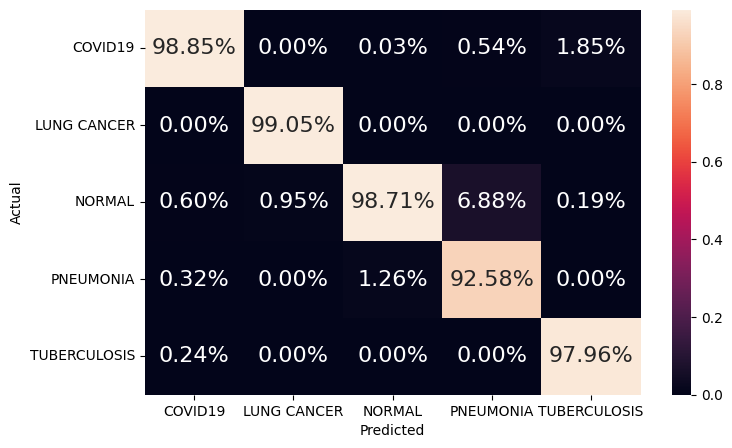

In [11]:
import seaborn as sns
df_cm=pd.DataFrame(confusionmatrix, columns=classes, index=classes)
df_cm.index.name='Actual'
df_cm.columns.name='Predicted'
plt.figure(figsize=(8,5))
sns.heatmap(df_cm/np.sum(df_cm), fmt='.2%', annot=True, annot_kws={'size':16})
plt.show()